## **PRAKTIKUM INFRASTRUKTUR DAN PLATFORM UNTUK SAINS DATA**
### **TUGAS 2**
Nama : Ardelia Rachma Laksita

NIM : 2311110051

Kelas : SISD-04-01

# **IMPORT LIBRARY**

In [41]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import collections
from sklearn.preprocessing import RobustScaler, MinMaxScaler

# **LOAD DATA**

In [42]:
# read csv
data = pd.read_csv('/content/diabetes.csv')
# panggil 'data' untuk ditampilkan dataframenya
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,627.00,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,351.00,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.00,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,167.00,21.0,0
4,0.0,NaN,40.0,35.0,168.0,43.1,NaN,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,171.00,NaN,0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.34,27.0,0
765,5.0,121.0,72.0,23.0,NaN,26.2,245.00,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,NaN,47.0,1


# **SOAL 1: IMPUTASI MISSING VALUE DENGAN MEAN, MEDIAN, DAN MODUS**

# **MISSING VALUE**

In [43]:
# cek missing value (nilai yang hilang)
data.isna().sum()

,0
Pregnancies,77
Glucose,115
BloodPressure,154
SkinThickness,38
Insulin,192
BMI,230
DiabetesPedigreeFunction,77
Age,154
Outcome,0


In [44]:
# cek missing value (nilai yang hilang) dan disimpan dalam variabel missing_values
missing_values = data.isna().sum()

# hitung jumlah nilai yang hilang per kolom
missing_per_column = missing_values.sum()

# hitung total nilai yang hilang dalam seluruh DataFrame
total_missing = missing_values.sum().sum()

print("Jumlah nilai yang hilang per kolom:")
print(missing_per_column)
print(f"Total nilai yang hilang dalam dataset: {total_missing}")

Jumlah nilai yang hilang per kolom:
1037
Total nilai yang hilang dalam dataset: 1037


Berdasarkan output tersebut, diperoleh total nilai yang hilang dalam dataset yaitu sebanyak 1037.

## **Imputasi mean, median, dan modus pada semua variabel**

Imputasi mean, median, dan modus dilakukan untuk seluruh klom engan memilih salah satu nilai yang ingin diimputasikan, yaitu antara nilai mean, median, atau modus.

### (1) Mean Imputation

In [45]:
# mean imputation
mean_impute_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
imputer_mean = SimpleImputer(strategy='mean')
data[mean_impute_columns] = imputer_mean.fit_transform(data[mean_impute_columns])
# cek missing values setelah imputasi
print("Missing values after mean imputation:\n", data.isnull().sum())

Missing values after mean imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Output di atas menunjukkan bahwa semua missing values telah berhasil diisi menggunakan nilai mean.

### (2) Median Imputation

In [46]:
# median imputation
median_impute_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
imputer_median = SimpleImputer(strategy='mean')
data[median_impute_columns] = imputer_median.fit_transform(data[median_impute_columns])
# cek missing values setelah imputasi
print("Missing values after median imputation:\n", data.isnull().sum())

Missing values after median imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Output di atas menunjukkan bahwa semua missing values telah berhasil diisi menggunakan nilai median.

### (3) Mode Imputation

In [47]:
# mode imputation
mode_impute_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
imputer_mode = SimpleImputer(strategy='mean')
data[mode_impute_columns] = imputer_mode.fit_transform(data[mode_impute_columns])
# cek missing values setelah imputasi
print("Missing values after mode imputation:\n", data.isnull().sum())

Missing values after mode imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Output di atas menunjukkan bahwa semua missing values telah berhasil diisi menggunakan nilai modus.

## **Imputasi mean, median, dan modus pada variabel atau kolom tertentu**

Selain imputasi pada semua variabel, kita juga bisa memilih variabel tertentu untuk dipilih imputasinya sehingga nilai mean, median, dan modus masuk semua pada missing valuenya (dengan menyesuaikan variabel yang dipilih). Imputasi mean, median, dan modus pada variabel atau kolom tertentu artinya imputasi yang dilakukan hanya untuk kolom-kolom yang dipilih saja.

## **Mean Imputation**

Imputasi dilakukan pada kolom 'BMI', 'Insulin', 'BloodPressure', dan 'Age' menggunakan nilai mean.

In [48]:
# imputasi missing values dengan mean
mean_impute_columns = ['BMI', 'Insulin', 'BloodPressure', 'Age']
imputer_mean = SimpleImputer(strategy='mean')
data[mean_impute_columns] = imputer_mean.fit_transform(data[mean_impute_columns])

## **Median Imputation**

Imputasi dilakukan pada kolom 'Glucose' dan 'SkinThickness' menggunakan nilai median.

In [49]:
# imputasi missing values dengan median
median_impute_columns = ['Glucose', 'SkinThickness']
imputer_median = SimpleImputer(strategy='median')
data[median_impute_columns] = imputer_median.fit_transform(data[median_impute_columns])

## **Mode Imputation**

Imputasi dilakukan pada kolom 'Pregnancies' dan 'DiabetesPedigreeFunction' menggunakan nilai modus.

In [50]:
# imputasi missing values dengan mode (modus)
mode_impute_columns = ['Pregnancies', 'DiabetesPedigreeFunction']
imputer_mode = SimpleImputer(strategy='most_frequent')
data[mode_impute_columns] = imputer_mode.fit_transform(data[mode_impute_columns])

## **Cek Missing Value setelah Imputasi**

In [51]:
# cek missing values setelah imputasi
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Dengan demikian, sudah tidak ada missing value atau bisa dikatakan bahwa missing value sudah diatasi menggunakan statisthical imputation yaitu dengan imputasi mean, median, dan modus.

# **SOAL 2: CEK KORELASI ANTAR VARIABEL DENGAN HEATMAP**

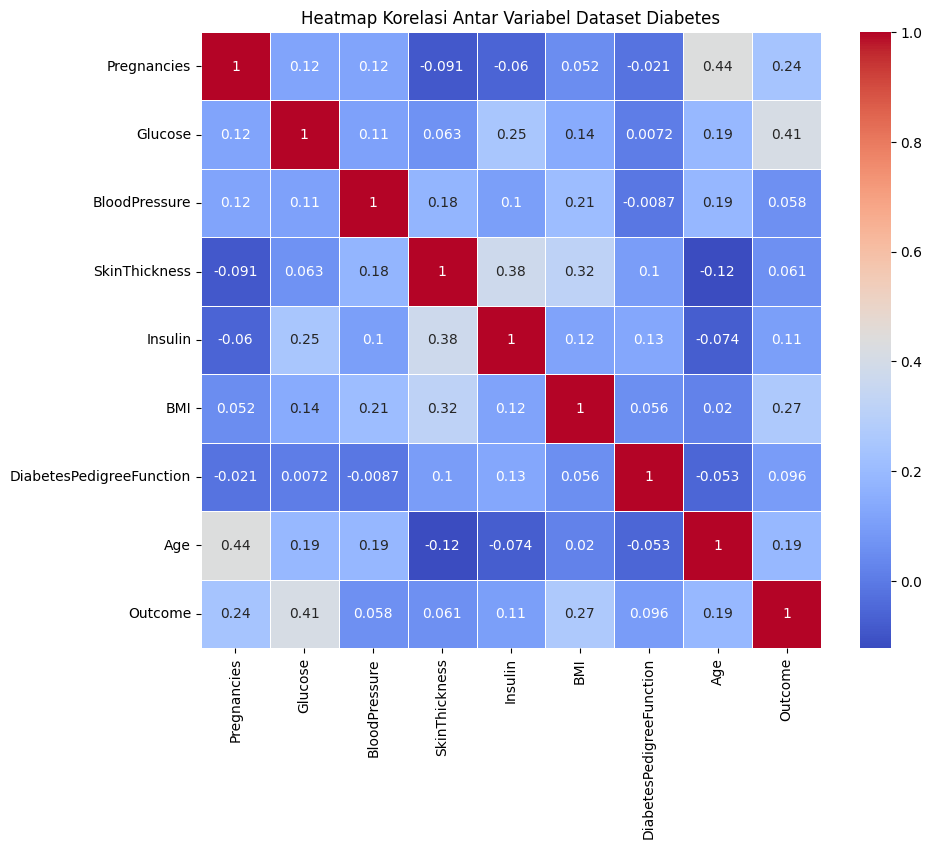

In [52]:
# hitung korelasi antar variabel
correlation_matrix = data.corr()

# visualisasi heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Dataset Diabetes")
plt.show()

Untuk mengetahui dua hubungan atau lebih pada variabel di dataset maka kami menggunakan Heatmap korelasi. Dengan keterangan sebagai berikut :

- Sumbu X dan Sumbu Y menampilkan nama-nama variabel pada dataset.
- Skala disebelah kanan heatmap menunjukkan intensitas korelasi dimana -1 (korelasi negatif sempurna) dan +1 (korelasi positif sempurna).

- Warna :

  1. Merah : korelasi positif (Jika satu variabel meningkat maka variabel lainnya ikut meningkat).
  2. Biru : korelasi negatif. (Jika satu variabel meningkat, maka variabel lainnya cenderung menurun).
  3. Putih : tidak terdapat korelasi/ korelasi sangat lemah.
  
  Semakin gelap warna maka semakin kuat korelasinya.

- **Korelasi Negatif (Nilai mendekati -1):**

  a. Lemah
  1. Pregnancies dengan SkinThickness (-0.091).
  2. Pregnancies dengan Insulin (-0.06).
  3. Pregnancies dengan DiabetesPedigreeFunction (-0.021).
  4. BloodPressure dengan DiabetesPedigreeFunction (-0.0087).
  5. SkinThickness dengan Age (-0.12).
  6. Insulin dengan Age (-0.074)
  7. Dst.
     
- **Korelasi Positif (Nilai mendekati 1)**

  a. Kuat
  1. Pregnancies dengan Age (0.44).
  2. Glucose dengan Outcome (0.41).
  3. BMI dengan Outcome (0.27).
  4. Dst.

Meskipun Heatmap didominasi oleh variabel dengan korelasi negatif tetapi variabel dengan korelasi positif cenderung lebih kuat. Terutama antar variabel yang sama dimana memiliki tingkat korelasi sebesar 1.


# **SOAL 3: LAKUKAN IMBALANCE HANDLING DENGAN UNDERSAMPLING**

Undersampling adalah teknik untuk menyeimbangkan kumpulan data yang tidak seimbang (imbalanced data) dengan mempertahankan semua data dalam kelas minoritas dan mengurangi ukuran data sehingga jumlahnya nanti akan sama seperti kelas minoritas.

In [53]:
# lakukan imbalance handling
X, y = make_classification(n_samples=1000, n_features=20, n_classes=3, n_clusters_per_class=1, weights=[0.1, 0.3, 0.6], random_state=42)

# split dataset ke training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# lakukan undersampling
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# tampilkan distribusi kelas sebelum undersampling
print("Data sebelum Undersampling:")
print("Class 0:", len(y_train[y_train == 0]))
print("Class 1:", len(y_train[y_train == 1]))
print("Class 2:", len(y_train[y_train == 2]))
print()

# tampilkan distribusi kelas setelah undersampling
print("Data setelah Undersampling:")
print("Class 0:", len(y_resampled[y_resampled == 0]))
print("Class 1:", len(y_resampled[y_resampled == 1]))
print("Class 2:", len(y_resampled[y_resampled == 2]))

Data sebelum Undersampling:
Class 0: 80
Class 1: 246
Class 2: 474

Data setelah Undersampling:
Class 0: 80
Class 1: 80
Class 2: 80


Pada output tersebut, terlihat bahwa datanya imbalance (imbalanced data) karena pada Class 0 terdapat 80 data, Class 1 terdapat 246 data, dan Class 2 terdapat 474 data dimana masing-masing Class memiliki perbedaan jumlah data. Untuk membuat jumlah data ketiga Class sama, maka dilakukan undersampling yaitu mengurangi sampling sehingga jumlahnya sama seperti jumlah yang terkecil yaitu 80. Undersampling dilakukan menggunakan library from imblearn.under_sampling import RandomUnderSampler. Dengan demikian, jumlah masing-masing Class setelah undersampling sudah sama yaitu sebanyak 80.

# **SOAL 4: LAKUKAN SCALING DENGAN ROBUST SCALER DAN MINMAX**

Scaling merupakan proses mengubah rentang nilai suatu dataset sehingga tidak ada suatu fitur yang mendominasi. Hal ini diperlukan apabila algoritma sensitif terhadap skala data. Selain itu, interpretasi juga lebih mudah apabila ada scaling.

## **Robust Scaler**

Robust scaler digunakan untuk data yang memiliki outliers dan belum ditangani. Robust Scaler akan menggunakan kuartil untuk menentukan rentang interkuartil (IQR). Jika banyak outliersnya, maka robust scaler lebih baik daripada min-max scaler.

In [54]:
# Robust Scaler
robust_scaler = RobustScaler()
data_robust_scaled = robust_scaler.fit_transform(data)

# convert hasil scaling kembali ke dataframe
data_robust_scaled_df = pd.DataFrame(data_robust_scaled, columns=data.columns)

# tampilkan hasil scaling dengan robust scaler
print("Data setelah Robust Scaling:")
print(data_robust_scaled_df)

Data setelah Robust Scaling:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.549204  0.000000       0.233901        0.40625 -0.831119  0.000000   
1      -0.700796 -1.099612      -0.227637        0.21875 -0.831119  0.000000   
2       1.049204  1.939148      -0.381483       -0.68750 -0.831119 -1.879715   
3      -0.700796 -0.975581      -0.227637        0.03125  0.185098 -0.841877   
4      -0.950796  0.000000      -2.227637        0.40625  0.985098  2.401366   
..           ...       ...            ...            ...       ...       ...   
763     1.549204 -0.603488       0.541594        0.81250  1.114827  0.195961   
764    -0.450796  0.047675       0.080055        0.15625 -0.831119  1.039204   
765     0.299204  0.016667       0.233901        0.03125  0.000000 -1.252688   
766    -0.700796  0.171706      -0.689176       -0.68750 -0.831119 -0.409444   
767    -0.700796 -0.851550       0.000000        0.28125 -0.831119 -0.344580   

     Diabe

## **Min-Max Scaler**

Min-Max scaler digunakan untuk data yang outliersnya biasanya sudah ditangani. Scaling yang dilakukan biasanya sudah memiliki rentang tertentu sehingga belum tentu menggunakan kuartil. Biasanya juga menggunakan nilai minimum dan maksimum dari fitur. Min-Max cocok digunakan untuk data yang tidak terlalu banyak outliers atau data yang outliersnya tidak signifikan.

In [55]:
# Min-Max Scaler
min_max_scaler = MinMaxScaler()
data_min_max_scaled = min_max_scaler.fit_transform(data)

# convert hasil scaling kembali ke dataframe
data_min_max_scaled_df = pd.DataFrame(data_min_max_scaled, columns=data.columns)

# tampilkan hasil scaling dengan Min-Max
print("\nData setelah Min-Max Scaling:")
print(data_min_max_scaled_df)


Data setelah Min-Max Scaling:
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.605339       0.631579       0.353535  0.000000  0.476806   
1       0.058824  0.427136       0.578947       0.292929  0.000000  0.476806   
2       0.470588  0.919598       0.561404       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.578947       0.232323  0.138235  0.418778   
4       0.000000  0.605339       0.350877       0.353535  0.247059  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.666667       0.484848  0.264706  0.490313   
764     0.117647  0.613065       0.614035       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.631579       0.232323  0.113057  0.390462   
766     0.058824  0.633166       0.526316       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.604906       0.313131  0.000000  0.453055   

     Dia

Melalui output kedua scaler di atas, kita dapat membandingkan pada masing-masing sel memiliki nilai tertinggi pada scaler yang mana. Terlihat bahwa pada Robust Scaler lebih banyak terdapat nilai - (negatif). Sedangkan pada Min-Max Scaler tidak memiliki nilai negatif. Dengan demikian, dapat diketahui bahwa sebagian besar nilai scaling tertingginya ada pada Min-Max Scaling, salah satunya pada variable atau kolom Age.